In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import confusion_matrix

We first import the data into a training and a test set

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [15]:
print(X_train.shape) # (60000, 28, 28)
print(Y_train.shape) # (60000,)

(60000, 28, 28)
(60000,)


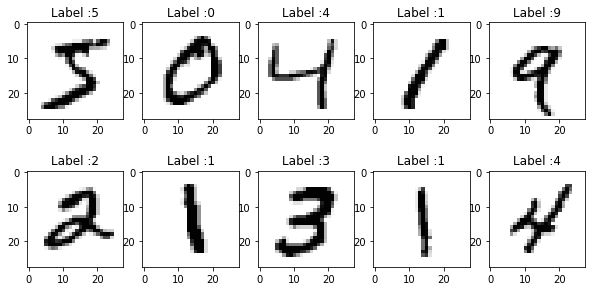

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    image = X_train[i]
    label = Y_train[i]
    ax[i//5, i % 5].imshow(image, cmap='gray_r')
    ax[i//5, i % 5].set_title('Label :{}'.format(label))

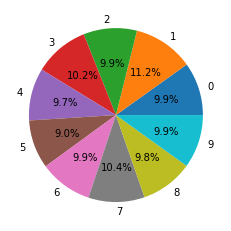

In [17]:
_=plt.pie(np.bincount(Y_train), labels=np.unique(Y_train), autopct='%1.1f%%')

## Classifying images of handwritten digits

#### FNN

In [18]:
X_train = X_train.reshape(60000, 784,) # for training a regular FNN
X_test = X_test.reshape(10000, 784,)

# one-hot encode target column
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

We first chose to train an FNN with one hidden layer containing 20 neurons

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=784, activation='relu')) # 28x28=784
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# I'll be using the adam optimizer function known for its perfomance. For more detail on other optimizers
# available in literature, check out my post about optimization functions

m = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15)

Text(0, 0.5, 'val_loss')

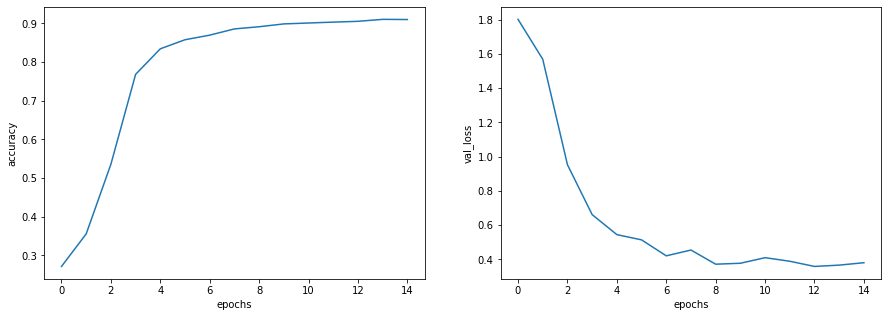

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#['loss', 'accuracy', 'val_loss', 'val_accuracy']

ax[0].plot(m.history['accuracy'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(m.history['val_loss'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('val_loss')

We can clearly see that just around 8 epochs, the accuracy starts stagnating around 90%

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu')) # 28x28=784
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15)

Text(0, 0.5, 'val_loss')

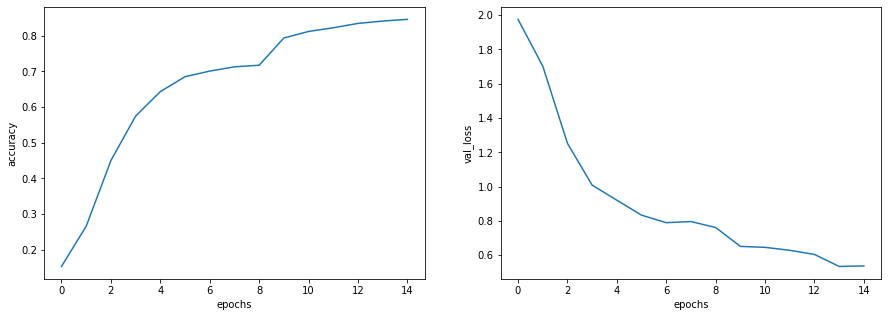

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#['loss', 'accuracy', 'val_loss', 'val_accuracy']

ax[0].plot(m.history['accuracy'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(m.history['val_loss'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('val_loss')

As we can see, the evolution of the accuracy is a lot more irregular, it takes more time for the algorithm to converge, and even if it does it still falls short compared to the previous neural network

#### CNN

In [37]:
X_train = X_train.reshape(60000, 28, 28, 1) # for training a CNN
X_test = X_test.reshape(10000, 28, 28, 1)

# one-hot encode target column
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [38]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile the model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_CNN = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 29s 16ms/step - loss: 2.3381 - accuracy: 0.2965 - val_loss: 1.7289 - val_accuracy: 0.3445
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 1.6757 - accuracy: 0.3609 - val_loss: 1.5716 - val_accuracy: 0.3856
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 1.3420 - accuracy: 0.4868 - val_loss: 1.0752 - val_accuracy: 0.6040
Epoch 4/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.9042 - accuracy: 0.6457 - val_loss: 0.7447 - val_accuracy: 0.7477
Epoch 5/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.6035 - accuracy: 0.7721 - val_loss: 0.4875 - val_accuracy: 0.8234
Epoch 6/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4104 - accuracy: 0.8470 - val_loss: 0.3556 - val_accuracy: 0.8976
Epoch 7/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2882 - accuracy: 0.9202 - val_loss: 0.2396 -

Text(0, 0.5, 'val_loss')

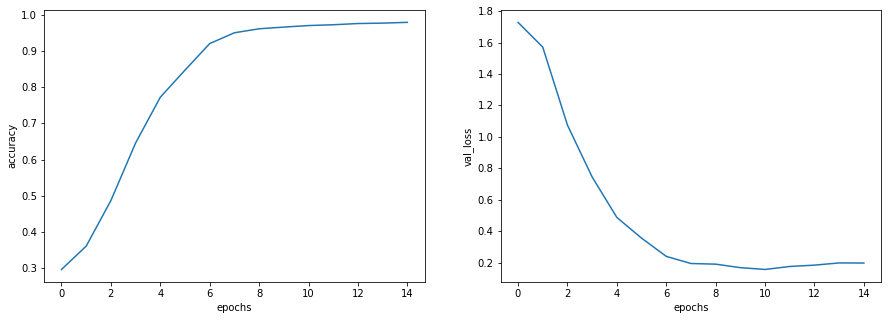

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#['loss', 'accuracy', 'val_loss', 'val_accuracy']

ax[0].plot(m_CNN.history['accuracy'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(m_CNN.history['val_loss'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('val_loss')

The accuracy gets close enough to 98%